### Normalization and Image Batching

#### imports

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageShow
from staintools.utils.visual import read_image, show, show_colors, build_stack, patch_grid
from staintools import ReinhardNormalizer, MacenkoNormalizer, VahadaneNormalizer
from staintools import standardize_brightness
from sklearn.feature_extraction.image import extract_patches_2d

In [2]:
# skimage imports



In [3]:
images = []
dirs = []
with os.scandir("/Volumes/sd/capstone_datasets/breasthistology/Training_data") as scan:
    for entry in scan:
        if not entry.name.startswith("."):
            dirs.append(entry.name)
            dircount = 0
            with os.scandir(entry.path) as sub:
                print(dirs[dircount])
                '''open up the image files and '''
#                 for file in sub: 
#                     print(file.path)
#                     if file.name.endswith(".tif"):
#                         try:
#                             img = Image.open(file.path)
#                             images.append(img)
#                             print("{} --> LOADED {}".format(entry.name, file.name))
#                         except:
#                             print("ERROR: /{}/ LOAD FAILURE: {}".format(entry.name, file.name))
#                             pass

Benign
Benign
Benign
Benign


In [4]:
dirs

['Benign', 'In Situ', 'Invasive', 'Normal']

---

## TEST
---
_normalize and segment one file_

In [5]:
!pwd

/Users/saqibnizami/notebooks/DSI-US-4/Capstone


In [6]:
i0 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t0.tif")
# i1 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t1.tif")
# i2 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t2.tif")
# i3 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t3.tif")
# i4 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t4.tif")
# i5 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t5.tif")
# i6 = read_image("/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal/t6.tif")

# stack = build_stack((i0,i1,i2,i3,i4,i5))
# patch_grid(stack, width=3)

standardize brightness

Original file:


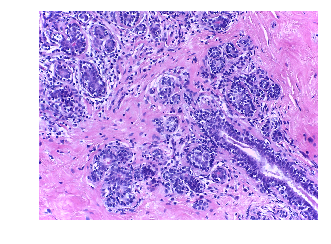

Standardized Brightness:


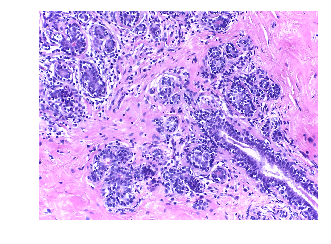

In [51]:
print("Original file:")
show(i0, fig_size=(5,5))
i0_std = standardize_brightness(i0)
print("Standardized Brightness:")
show(std, fig_size=(5,5))

use `sklearn` to `extract_patches_2d`:

vahadane normalization

Using brightness standardization


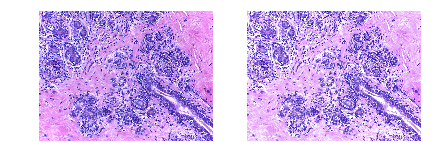

In [52]:
v_norm = VahadaneNormalizer()
v_norm.fit(i0_std)
new_patch = build_stack((i0, v_norm.transform(i0_std)))
patch_grid(new_patch)

In [54]:
i0_norm = v_norm.transform(i0_std)

In [55]:
i0_norm.shape

(1536, 2048, 3)

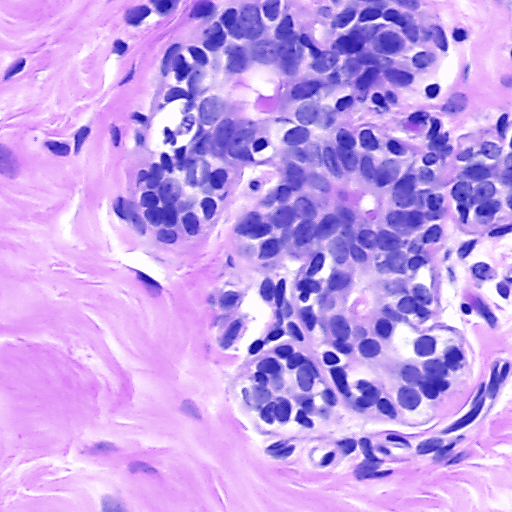

In [27]:
Image.fromarray(patches[0]).save("./i0i")

In [56]:
patches = extract_patches_2d(i0_norm, patch_size=(512,512), max_patches=35)

In [58]:
Image.fromarray(patches[0]).save("./t0_patch_1.png")

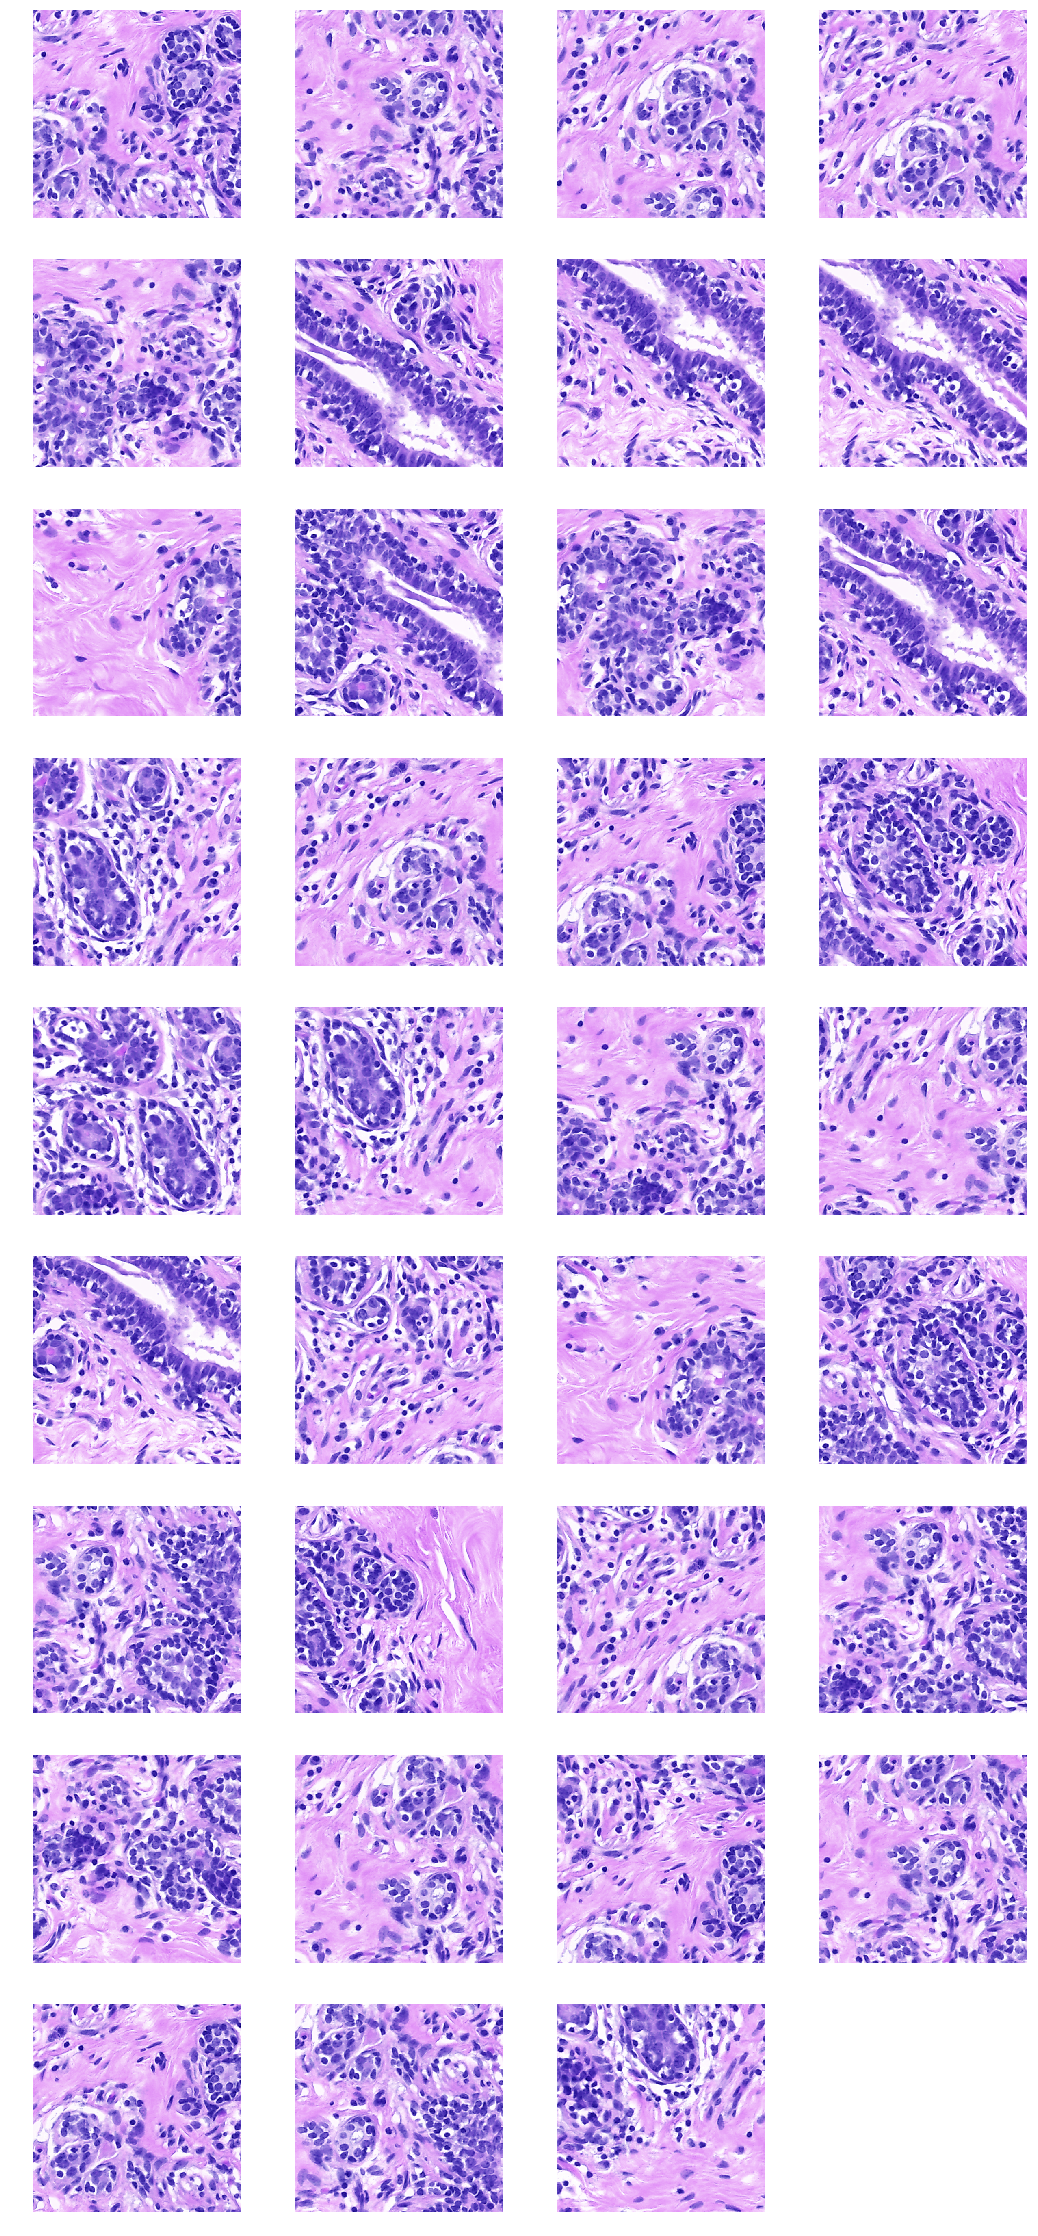

In [49]:
patch_grid(patches,width=4, save_name="./i0_norm_patch.png")

In [37]:
patch_list = []
for i,x in enumerate(patches):
    print(i)
    patch_list.append(Image.fromarray(x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [50]:
!pwd

/Users/saqibnizami/notebooks/DSI-US-4/Capstone


In [18]:
512*3

1536

In [46]:
len(patches)

35

In [37]:
with os.scandir("/Volumes/sd/capstone_datasets/breasthistology/Training_data/") as training:
    for folder in training:
        print(folder.path)

/Volumes/sd/capstone_datasets/breasthistology/Training_data/.DS_Store
/Volumes/sd/capstone_datasets/breasthistology/Training_data/Benign
/Volumes/sd/capstone_datasets/breasthistology/Training_data/In Situ
/Volumes/sd/capstone_datasets/breasthistology/Training_data/Invasive
/Volumes/sd/capstone_datasets/breasthistology/Training_data/Normal


---

keras.preprocessing.image.ImageDataGenerator
--> using keras for image manipulation